In [1]:
from ultralytics import YOLO

In [2]:
import ultralytics
print(dir(ultralytics))

['ASSETS', 'Explorer', 'FastSAM', 'NAS', 'RTDETR', 'SAM', 'SETTINGS', 'YOLO', 'YOLOWorld', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'cfg', 'checks', 'data', 'download', 'engine', 'hub', 'models', 'nn', 'os', 'settings', 'utils']


In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Load the YOLO model (YOLOv8)
model = YOLO('yolov8n.pt')  # You can use other pre-trained weights as well

# Open a connection to the camera (0 is typically the default camera)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Load a default font for text
font = ImageFont.load_default()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read frame.")
        break
    
    # Convert the frame to a format compatible with YOLO
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Perform inference
    results = model.predict(img_pil)
    
    # Draw bounding boxes and labels on the frame
    draw = ImageDraw.Draw(img_pil)
    
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
        scores = result.boxes.conf.cpu().numpy()  # Confidence scores
        class_ids = result.boxes.cls.cpu().numpy().astype(int)  # Class indices
        labels = result.names  # Class labels
        
        for box, score, class_id in zip(boxes, scores, class_ids):
            x1, y1, x2, y2 = map(int, box)
            label = f"{labels[class_id]}: {score:.2f}"
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            draw.text((x1, y1 - 10), label, fill="red", font=font)

    # Convert the image back to a format suitable for OpenCV
    img_np = np.array(img_pil)
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    
    # Display the resulting frame
    cv2.imshow('YOLO Object Detection', img_bgr)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 person, 454.4ms
Speed: 24.7ms preprocess, 454.4ms inference, 36.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 203.6ms
Speed: 11.5ms preprocess, 203.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 182.5ms
Speed: 0.0ms preprocess, 182.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 160.0ms
Speed: 7.4ms preprocess, 160.0ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 162.5ms
Speed: 0.0ms preprocess, 162.5ms inference, 15.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 148.3ms
Speed: 2.9ms preprocess, 148.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 137.9ms
Speed: 3.0ms preprocess, 137.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 142.8ms
Speed: 0.0ms preprocess, 142.8ms inference, 0.0ms postprocess per imag


image 1/1 C:\Users\DIGITAL ZONE\OneDrive\Desktop\Yolo\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 315.0ms
Speed: 33.1ms preprocess, 315.0ms inference, 49.9ms postprocess per image at shape (1, 3, 640, 480)


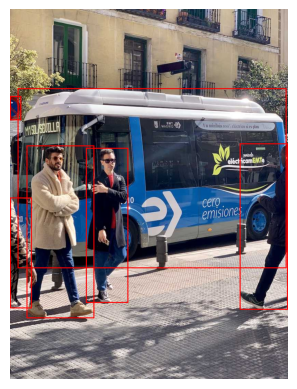

In [3]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

# Load the YOLO model (YOLOv8)
model = YOLO('yolov8n.pt')  # You can use other pre-trained weights as well

# Perform inference
results = model.predict('bus.jpg')

# Display results
for result in results:
    # Load the original image
    img = Image.open('bus.jpg')
    draw = ImageDraw.Draw(img)
    
    # Draw bounding boxes on the image
    boxes = result.boxes  # Assuming result.boxes contains bounding box coordinates
    for box in boxes.xyxy:  # Assuming box coordinates are in xyxy format
        x1, y1, x2, y2 = map(int, box)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    
    # Convert the image to a format suitable for matplotlib
    img_array = np.array(img)
    
    # Display the image with bounding boxes
    plt.imshow(img_array)
    plt.axis('off')  # Hide axes
    plt.show()